# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
city_l = []
country = []
datetime = []
#ids = []
lat = []
long = []
#temp = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []

errors = 0
processed = 0
n=0

#cities = ['chicago','isangel','talara']

############################################################################
##
##  NEED TO CHANGE THE LIMIT TO PROCESS ALL WHEN DONE TESTING
##
############################################################################

#for city in cities[:100]:
for city in cities:
    n += 1 
    try:
        response = requests.get(query_url + city).json()
        print(f"{n}. Processing City Number: {response['id']} | City: {city} ")
        city_l.append(response['name'])
        country.append(response['sys']['country'])
        datetime.append(response['dt'])
        #ids.append(response['id'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        #temp.append(response['main']['temp'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        processed +=1
        #time.sleep(1)
    except:
        print(f"*** ERROR PROCESSING CITY {city}")
        errors +=1
    time.sleep(1)
    

print("--- PROCESSING COMPLETE ---")
print(f"Successfully Processed: {processed}")
print(f"    Errors Encountered: {errors}")

1. Processing City Number: 3874787 | City: punta arenas 
2. Processing City Number: 3833367 | City: ushuaia 
3. Processing City Number: 2206939 | City: bluff 
4. Processing City Number: 3450083 | City: santa maria 
5. Processing City Number: 884979 | City: mutare 
6. Processing City Number: 4030556 | City: rikitea 
7. Processing City Number: 6170031 | City: tuktoyaktuk 
8. Processing City Number: 1106677 | City: bambous virieux 
*** ERROR PROCESSING CITY illoqqortoormiut
*** ERROR PROCESSING CITY fevralsk
11. Processing City Number: 4031574 | City: provideniya 
12. Processing City Number: 1855540 | City: naze 
13. Processing City Number: 2063036 | City: port lincoln 
14. Processing City Number: 962367 | City: richards bay 
15. Processing City Number: 934322 | City: mahebourg 
16. Processing City Number: 5557293 | City: sitka 
17. Processing City Number: 3369157 | City: cape town 
18. Processing City Number: 5122534 | City: jamestown 
19. Processing City Number: 2017155 | City: saskylak

156. Processing City Number: 1106643 | City: quatre cocos 
157. Processing City Number: 2012956 | City: yerbogachen 
158. Processing City Number: 3380290 | City: sinnamary 
159. Processing City Number: 4946620 | City: palmer 
160. Processing City Number: 5925975 | City: collingwood 
161. Processing City Number: 5364271 | City: laguna 
162. Processing City Number: 921786 | City: mitsamiouli 
163. Processing City Number: 3416888 | City: grindavik 
*** ERROR PROCESSING CITY labutta
*** ERROR PROCESSING CITY kegayli
166. Processing City Number: 2332453 | City: lagos 
167. Processing City Number: 2112802 | City: hasaki 
168. Processing City Number: 708324 | City: horodnytsya 
169. Processing City Number: 2163355 | City: hobart 
170. Processing City Number: 1624041 | City: ternate 
*** ERROR PROCESSING CITY kargapolye
172. Processing City Number: 2339150 | City: idanre 
173. Processing City Number: 1640344 | City: kendari 
174. Processing City Number: 2208248 | City: kaitangata 
175. Process

310. Processing City Number: 5044290 | City: saint anthony 
311. Processing City Number: 6180550 | City: whitehorse 
312. Processing City Number: 5563839 | City: fortuna 
313. Processing City Number: 5850554 | City: makakilo city 
*** ERROR PROCESSING CITY palabuhanratu
315. Processing City Number: 3361934 | City: saldanha 
316. Processing City Number: 2036973 | City: heihe 
317. Processing City Number: 4944903 | City: nantucket 
318. Processing City Number: 6074882 | City: minnedosa 
319. Processing City Number: 965528 | City: phalaborwa 
320. Processing City Number: 1489401 | City: toora-khem 
321. Processing City Number: 5961564 | City: glace bay 
322. Processing City Number: 3374083 | City: bathsheba 
*** ERROR PROCESSING CITY kamenskoye
324. Processing City Number: 1513990 | City: gazli 
325. Processing City Number: 3533462 | City: acapulco 
326. Processing City Number: 3929493 | City: san juan bautista 
327. Processing City Number: 2162683 | City: innisfail 
328. Processing City 

462. Processing City Number: 1037125 | City: montepuez 
463. Processing City Number: 3038789 | City: abbeville 
464. Processing City Number: 2137748 | City: voh 
465. Processing City Number: 553766 | City: kamenka 
466. Processing City Number: 3667202 | City: tibu 
467. Processing City Number: 2156643 | City: mount gambier 
468. Processing City Number: 5178195 | City: altoona 
*** ERROR PROCESSING CITY karkaralinsk
470. Processing City Number: 3419842 | City: sisimiut 
471. Processing City Number: 1623197 | City: tual 
472. Processing City Number: 4392388 | City: jefferson city 
473. Processing City Number: 515246 | City: onega 
474. Processing City Number: 2214846 | City: misratah 
*** ERROR PROCESSING CITY karaul
476. Processing City Number: 2121909 | City: poronaysk 
477. Processing City Number: 4018499 | City: angostura 
478. Processing City Number: 778707 | City: mehamn 
479. Processing City Number: 2125693 | City: evensk 
480. Processing City Number: 2454934 | City: kolondieba 
4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a data frame
weather_dict = {
    "city": city_l,
    "country": country, 
    "datetime": datetime,
    #"id": ids,
    "lat": lat,
    "long": long,
    #"temp": temp,
    "maxtemp" : maxtemp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "windspeed": windspeed}
    
#print(len(city_l))
#print(len(country))
#print(len(datetime))
#print(len(ids))
#print(len(lat))
#print(len(long))
#print(len(temp))
#print(len(humidity))
#print(len(cloudiness))
#print(len(windspeed))
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file, encoding="utf-8", index=False)
weather_data.head()

,city,country,datetime,lat,long,maxtemp,humidity,cloudiness,windspeed
0,Punta Arenas,CL,1633488223,-53.1500,-70.9167,42.91,61,0,12.66
1,Ushuaia,AR,1633488224,-54.8000,-68.3000,38.86,60,0,6.91
2,Bluff,NZ,1633488225,-46.6000,168.3333,65.80,80,100,7.94
3,Santa Maria,BR,1633488227,-29.6842,-53.8069,58.30,77,0,8.05
4,Mutare,ZW,1633488228,-18.9707,32.6709,60.37,95,55,3.69


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
weather_data["humidity"].max()

100

In [6]:
#  Get the indices of cities that have humidity over 100%.
invalid_data = weather_data[weather_data["humidity"] > 100]
invalid_data

,city,country,datetime,lat,long,maxtemp,humidity,cloudiness,windspeed


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print(f"# of Rows in Data Frame BEFORE: {len(weather_data)}")
clean_weather_data = weather_data[weather_data["humidity"] <= 100]
print(f"# of Rows in Data Frame AFTER: {len(clean_weather_data)}")

# of Rows in Data Frame BEFORE: 561
# of Rows in Data Frame AFTER: 561


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

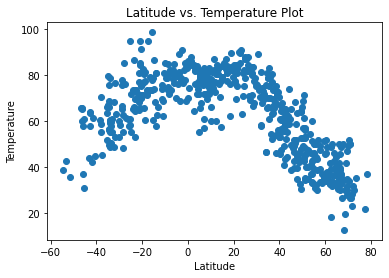

In [8]:
x_values = clean_weather_data['lat']
y_values = clean_weather_data['maxtemp']
plt.scatter(x_values,y_values)
plt.title('Latitude vs. Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('images/LatVsTemp.png')
plt.show()

## Latitude vs. Humidity Plot

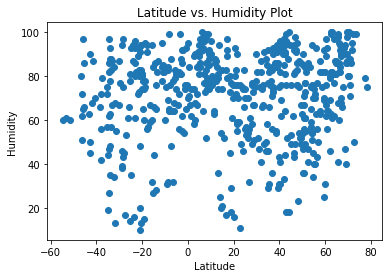

In [9]:
x_values = clean_weather_data['lat']
y_values = clean_weather_data['humidity']
plt.scatter(x_values,y_values)
plt.title('Latitude vs. Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('images/LatVsHum.png')
plt.show()

## Latitude vs. Cloudiness Plot

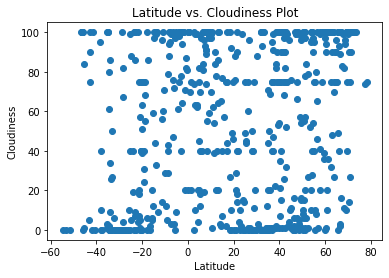

In [10]:
x_values = clean_weather_data['lat']
y_values = clean_weather_data['cloudiness']
plt.scatter(x_values,y_values)
plt.title('Latitude vs. Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('images/LatVsCloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

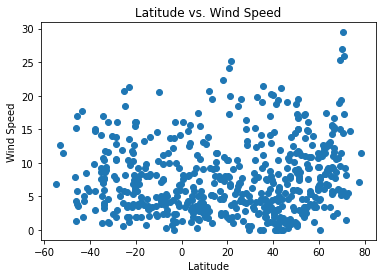

In [11]:
x_values = clean_weather_data['lat']
y_values = clean_weather_data['windspeed']
plt.scatter(x_values,y_values)
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('images/LatVsWind.png')
plt.show()

## Linear Regression

In [12]:
n_hemisphere = clean_weather_data.loc[weather_data["lat"] > 0]
s_hemisphere = clean_weather_data.loc[weather_data["lat"] < 0]
equator = clean_weather_data.loc[weather_data["lat"] == 0]

# Confirm no city is on the equator
equator

,city,country,datetime,lat,long,maxtemp,humidity,cloudiness,windspeed


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

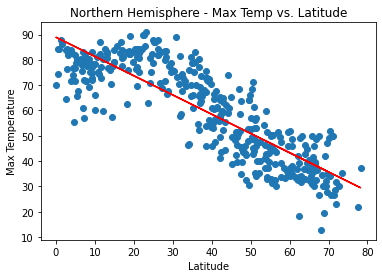

The correlation is -0.85


In [13]:
x_values = n_hemisphere['lat']
y_values = n_hemisphere['maxtemp']
plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
#plt.show()

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.savefig('images/NHem-MTempVsLat.png')
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation is {round(correlation[0],2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

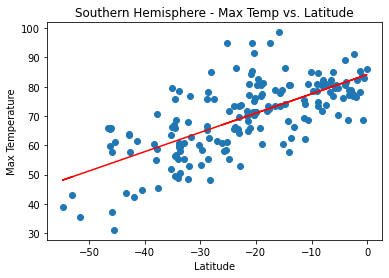

The correlation is 0.7


In [14]:
x_values = s_hemisphere['lat']
y_values = s_hemisphere['maxtemp']
plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(-25,45),fontsize=15,color="red")
plt.savefig('images/SHem-MTempVsLat.png')
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation is {round(correlation[0],2)}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

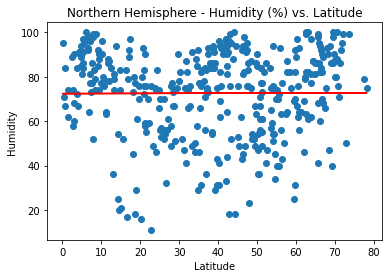

The correlation is 0.01


In [15]:
x_values = n_hemisphere['lat']
y_values = n_hemisphere['humidity']
plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(45,15),fontsize=15,color="red")
plt.savefig('images/NHem-HumidVsLat.png')
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation is {round(correlation[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

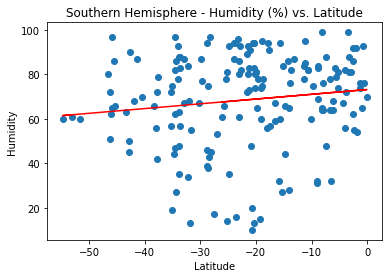

The correlation is 0.13


In [16]:
x_values = s_hemisphere['lat']
y_values = s_hemisphere['humidity']
plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.savefig('images/SHem-HumidVsLat.png')
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation is {round(correlation[0],2)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

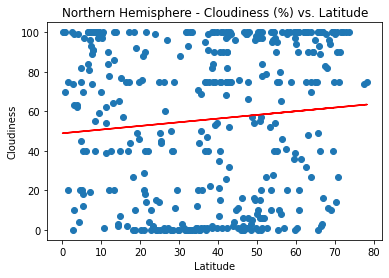

The correlation is 0.1


In [17]:
x_values = n_hemisphere['lat']
y_values = n_hemisphere['cloudiness']
plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(25,30),fontsize=15,color="red")
plt.savefig('images/NHem-CloudVsLat.png')
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation is {round(correlation[0],2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

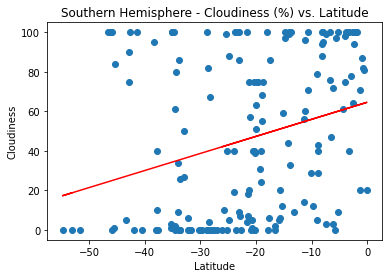

The correlation is 0.28


In [18]:
x_values = s_hemisphere['lat']
y_values = s_hemisphere['cloudiness']
plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.savefig('images/SHem-CloudVsLat.png')
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation is {round(correlation[0],2)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

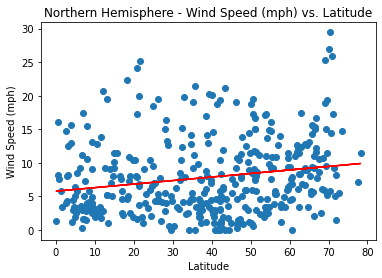

The correlation is 0.19


In [19]:
x_values = n_hemisphere['lat']
y_values = n_hemisphere['windspeed']
plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(35,15),fontsize=15,color="red")
plt.savefig('images/NHem-WindVsLat.png')
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation is {round(correlation[0],2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

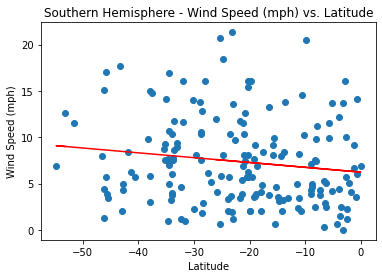

The correlation is -0.15


In [20]:
x_values = s_hemisphere['lat']
y_values = s_hemisphere['windspeed']
plt.scatter(x_values,y_values)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.savefig('images/SHem-WindVsLat.png')
plt.show()
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation is {round(correlation[0],2)}")